In [1]:
import numpy as np
import tensorflow as tf

In [2]:
class AdamOptim(tf.keras.optimizers.Optimizer):
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [3]:
def loss_function(m):
    return m**2-2*m+1
## take derivative
def grad_function(m):
    return 2*m-2
def check_convergence(w0, w1):
    return (w0 == w1)

In [4]:
w_0 = 0
b_0 = 0
adam = AdamOptim()
t = 1
converged = False

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 1: weight=0.009999999950000001
iteration 2: weight=0.01999725400385255
iteration 3: weight=0.029989900621600046
iteration 4: weight=0.039976060276935343
iteration 5: weight=0.049953839711732076
iteration 6: weight=0.05992133621693422
iteration 7: weight=0.06987664190678831
iteration 8: weight=0.07981784795404925
iteration 9: weight=0.08974304875491491
iteration 10: weight=0.0996503459940126
iteration 11: weight=0.10953785258172263
iteration 12: weight=0.11940369643843479
iteration 13: weight=0.12924602410293135
iteration 14: weight=0.13906300414491304
iteration 15: weight=0.14885283036466956
iteration 16: weight=0.15861372476597732
iteration 17: weight=0.1683439402914239
iteration 18: weight=0.17804176331244895
iteration 19: weight=0.1877055158694015
iteration 20: weight=0.19733355765979776
iteration 21: weight=0.2069242877756729
iteration 22: weight=0.21647614619342795
iteration 23: weight=0.22598761502184558
iteration 24: weight=0.23545721951596985
iteration 25: weight=0.24

<ipython-input-2-6eda7d20bb0c>:32: RuntimeWarning: invalid value encountered in sqrt
  b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))


In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
import os, time
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [37]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=x_train[0].shape))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [28]:
# Adam
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adam_history = model.fit(x_train, y_train, epochs = 15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 28s 14ms/step - loss: 0.8102 - accuracy: 0.8776 - val_loss: 0.1271 - val_accuracy: 0.9603
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1202 - accuracy: 0.9634 - val_loss: 0.0958 - val_accuracy: 0.9692
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0907 - accuracy: 0.9724 - val_loss: 0.0820 - val_accuracy: 0.9748
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0765 - accuracy: 0.9762 - val_loss: 0.0753 - val_accuracy: 0.9768
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0677 - accuracy: 0.9787 - val_loss: 0.0684 - val_accuracy: 0.9797
Epoch 6/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0668 - val_accuracy: 0.9805
Epoch 7/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0594 -

In [30]:
# SGD
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sgd_history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 28s 14ms/step - loss: 1.6825 - accuracy: 0.7404 - val_loss: 0.3384 - val_accuracy: 0.8961
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3546 - accuracy: 0.8957 - val_loss: 0.3131 - val_accuracy: 0.9093
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3249 - accuracy: 0.9054 - val_loss: 0.2904 - val_accuracy: 0.9144
Epoch 4/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3155 - accuracy: 0.9071 - val_loss: 0.3108 - val_accuracy: 0.9076
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3116 - accuracy: 0.9085 - val_loss: 0.2527 - val_accuracy: 0.9262
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2998 - accuracy: 0.9113 - val_loss: 0.2762 - val_accuracy: 0.9186
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2970 - accuracy: 0.9105 - val_loss: 0.2398 -

In [32]:
# RMSProp
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rmsprop_history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5689 - accuracy: 0.9205 - val_loss: 0.0879 - val_accuracy: 0.9748
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0861 - accuracy: 0.9753 - val_loss: 0.0746 - val_accuracy: 0.9781
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0669 - accuracy: 0.9806 - val_loss: 0.0622 - val_accuracy: 0.9828
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0584 - accuracy: 0.9836 - val_loss: 0.0718 - val_accuracy: 0.9802
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0529 - accuracy: 0.9853 - val_loss: 0.0793 - val_accuracy: 0.9798
Epoch 6/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0502 - accuracy: 0.9856 - val_loss: 0.0626 - val_accuracy: 0.9835
Epoch 7/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0503 - accuracy: 0.9862 - val_loss: 0.0851 -

In [34]:
# Adagrad
model.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adagrad_history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 5.5918 - accuracy: 0.6216 - val_loss: 2.4887 - val_accuracy: 0.7511
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 2.1621 - accuracy: 0.7762 - val_loss: 1.7068 - val_accuracy: 0.8083
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 1.6167 - accuracy: 0.8161 - val_loss: 1.3697 - val_accuracy: 0.8334
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 1.3408 - accuracy: 0.8393 - val_loss: 1.1689 - val_accuracy: 0.8498
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1642 - accuracy: 0.8535 - val_loss: 1.0349 - val_accuracy: 0.8621
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 1.0402 - accuracy: 0.8645 - val_loss: 0.9356 - val_accuracy: 0.8713
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.9467 - accuracy: 0.8729 - val_loss: 0.8589 -

In [36]:
# Adadelta
model.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adadelta_history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 27.4410 - accuracy: 0.1074 - val_loss: 21.1261 - val_accuracy: 0.1258
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 18.0776 - accuracy: 0.1434 - val_loss: 15.9337 - val_accuracy: 0.1716
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 14.3157 - accuracy: 0.1935 - val_loss: 13.1149 - val_accuracy: 0.2170
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 11.9470 - accuracy: 0.2407 - val_loss: 11.0811 - val_accuracy: 0.2565
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 10.1795 - accuracy: 0.2824 - val_loss: 9.5072 - val_accuracy: 0.2948
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 8.7992 - accuracy: 0.3198 - val_loss: 8.2574 - val_accuracy: 0.3293
Epoch 7/15
1875/1875 [==============================] - 29s 15ms/step - loss: 7.6908 - accuracy: 0.3533 - val_loss:

In [38]:
# Adamax
model.compile(optimizer=tf.keras.optimizers.Adamax(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adamax_history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 30s 15ms/step - loss: 1.3082 - accuracy: 0.8213 - val_loss: 0.2641 - val_accuracy: 0.9268
Epoch 2/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2012 - accuracy: 0.9434 - val_loss: 0.1456 - val_accuracy: 0.9588
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1221 - accuracy: 0.9633 - val_loss: 0.1012 - val_accuracy: 0.9698
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0914 - accuracy: 0.9714 - val_loss: 0.0884 - val_accuracy: 0.9740
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0729 - accuracy: 0.9776 - val_loss: 0.0762 - val_accuracy: 0.9772
Epoch 6/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.0713 - val_accuracy: 0.9786
Epoch 7/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0714 -

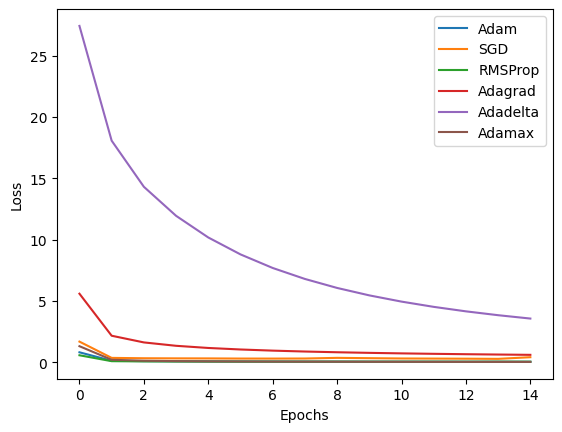

In [39]:
plt.plot(adam_history.history['loss'], label = 'Adam')
plt.plot(sgd_history.history['loss'], label = 'SGD')
plt.plot(rmsprop_history.history['loss'], label = 'RMSProp')
plt.plot(adagrad_history.history['loss'], label = 'Adagrad')
plt.plot(adadelta_history.history['loss'], label = 'Adadelta')
plt.plot(adamax_history.history['loss'], label = 'Adamax')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

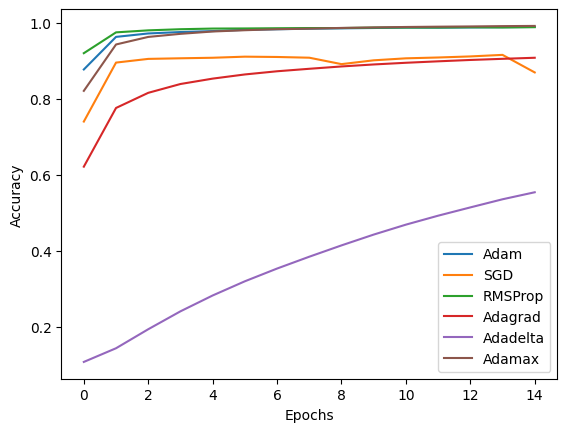

In [40]:
plt.plot(adam_history.history['accuracy'], label = 'Adam')
plt.plot(sgd_history.history['accuracy'], label = 'SGD')
plt.plot(rmsprop_history.history['accuracy'], label = 'RMSProp')
plt.plot(adagrad_history.history['accuracy'], label = 'Adagrad')
plt.plot(adadelta_history.history['accuracy'], label = 'Adadelta')
plt.plot(adamax_history.history['accuracy'], label = 'Adamax')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

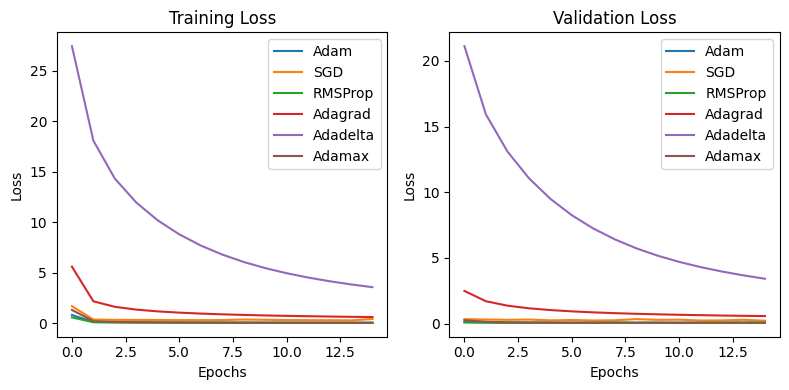

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot loss on the left subplot
axs[0].plot(adam_history.history['loss'], label='Adam')
axs[0].plot(sgd_history.history['loss'], label='SGD')
axs[0].plot(rmsprop_history.history['loss'], label='RMSProp')
axs[0].plot(adagrad_history.history['loss'], label='Adagrad')
axs[0].plot(adadelta_history.history['loss'], label='Adadelta')
axs[0].plot(adamax_history.history['loss'], label='Adamax')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')
axs[0].legend()

# Plot validation loss on the right subplot
axs[1].plot(adam_history.history['val_loss'], label='Adam')
axs[1].plot(sgd_history.history['val_loss'], label='SGD')
axs[1].plot(rmsprop_history.history['val_loss'], label='RMSProp')
axs[1].plot(adagrad_history.history['val_loss'], label='Adagrad')
axs[1].plot(adadelta_history.history['val_loss'], label='Adadelta')
axs[1].plot(adamax_history.history['val_loss'], label='Adamax')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Validation Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

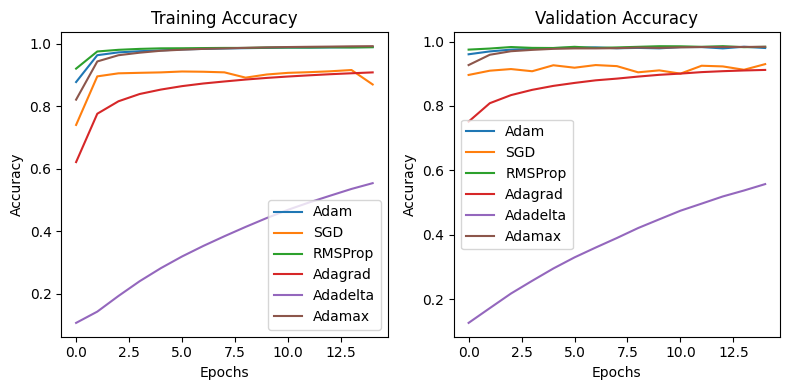

In [46]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot accuracy on the left subplot
axs[0].plot(adam_history.history['accuracy'], label='Adam')
axs[0].plot(sgd_history.history['accuracy'], label='SGD')
axs[0].plot(rmsprop_history.history['accuracy'], label='RMSProp')
axs[0].plot(adagrad_history.history['accuracy'], label='Adagrad')
axs[0].plot(adadelta_history.history['accuracy'], label='Adadelta')
axs[0].plot(adamax_history.history['accuracy'], label='Adamax')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training Accuracy')
axs[0].legend()

# Plot validation accuracy on the right subplot
axs[1].plot(adam_history.history['val_accuracy'], label='Adam')
axs[1].plot(sgd_history.history['val_accuracy'], label='SGD')
axs[1].plot(rmsprop_history.history['val_accuracy'], label='RMSProp')
axs[1].plot(adagrad_history.history['val_accuracy'], label='Adagrad')
axs[1].plot(adadelta_history.history['val_accuracy'], label='Adadelta')
axs[1].plot(adamax_history.history['val_accuracy'], label='Adamax')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Validation Accuracy')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()